In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Rubeyの式について


1. Rubeyの式を用いて、粒径(x軸)と沈降速度(y軸)の関係を図示せよ。ただし、水温は5℃、25℃の2ケースとする。

Rubeyの式による沈降速度$w_0$は以下のとおりである。

$$
\begin{align}
w_0 &= \sqrt{sgd}F \\
F &= \sqrt{ \dfrac{2}{3} + \dfrac{36 \nu^2}{sgd^3}}  -\sqrt{\dfrac{36 \nu^2}{sgd^3}} 
\end{align}
$$

ここに、$s$：砂礫の水中比重、$g$：重力加速度、$d$：粒径、$\nu$：水の動粘度係数である。

水の動粘度係数は[JIS Z 8803](https://kikakurui.com/z8/Z8803-2011-01.html)により、以下のように定義されている。


 - 5℃：$1.5186 \times 10^{-6} \, \text{m}^2/\text{s}$
 - 25℃：$0.8925 \times 10^{-6} \, \text{m}^2/\text{s}$

![](fig/kinematic_viscosity.png)



In [2]:
def rubeyw0(dd, nu=10**(-6)):
    rhosw = 1.65 # Specific gravity in water of sand 
    g = 9.8 # acceleration of gravity
    tmp = 36.0*nu**2/rhosw/g/dd**3
    F = np.sqrt(2.0/3.0 + tmp) - np.sqrt(tmp)
    
    return np.sqrt(rhosw*g*dd)*F

In [3]:
dm = np.logspace(-2,1,10000)
dm /= 1000
w0_5 = np.array( [rubeyw0(dmp, nu=1.5186e-6) for dmp in dm] )
w0_25 = np.array( [rubeyw0(dmp, nu=0.8925e-6) for dmp in dm] )

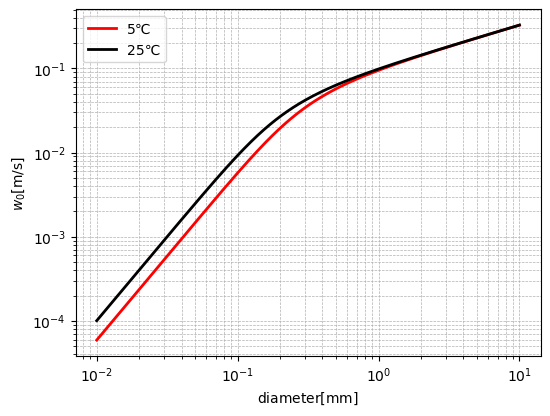

In [4]:
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.plot(dm*1000, w0_5, 'r-', label='5℃', lw=2)
ax.plot(dm*1000, w0_25, 'k-', label='25℃', lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('diameter$[\\mathrm{mm}]$')
ax.set_ylabel('$w_0[\\mathrm{m/s}]$')
ax.grid(which='both', linestyle='--', lw=0.5)
ax.legend(loc='best')
plt.show()

2. 水深20mの閉鎖性水域において0.1mmの粒子が水面から河床まで沈降するのに要する時間を求めよ。

In [5]:
w0_5  = rubeyw0(0.1/1000, nu=1.5186e-6)
w0_25 = rubeyw0(0.1/1000, nu=0.8925e-6)

print(f'5℃: {20/w0_5:.3f} sec', f'25℃: {20/w0_25:.3f} sec')

5℃: 3487.329 sec 25℃: 2158.887 sec


### 補足：終末沈降速度に到達するまでの時間

ストークス領域（粒径が1mm程度以下）では理論的に求めることができる。

沈降運動する粒子の運動方程式は以下のように表される。

$$
M \frac{d w_1}{d t}=(M-m) g-\frac{1}{2} m \frac{d w_1}{d t}-3 \pi d \mu w_1
$$

ここに、$M=\pi d^3\sigma/6$、$m=\pi d^3\rho/6$、$g$：重力加速度、$d$：粒径、$\rho$：流体の密度、$\sigma$：粒子の密度、$\mu$：水の粘性係数である。


$t=0$で$w_1=0$として時間積分すると、以下の特殊解が得られる。

$$
\begin{align}
& \frac{w_1}{w_0}=1-e^{-\xi t} \\
& w_0=\frac{g d^2}{18 \nu}\left(\frac{\sigma}{\rho}-1\right) \\
& \xi=\frac{36 \nu}{d^2} /\left(\frac{2 \sigma}{\rho}+1\right)
\end{align}
$$

$w_1/w_0=1$となる時間$t$を求めることで、終末沈降速度に到達するまでの時間を求めることができる。

w_1/w_0は無限大となるため0.999として計算すると、0.1mmでは0.0034秒となる。
よって、沈降速度=終末沈降速度と取り扱っても問題ない。



In [6]:
rho = 2.65
sigma = 1.0
s = rho - sigma
d = 0.1/1000
g = 9.8
nu = 1.0e-6
w0 = g*d**2/18/nu*s
xi = 36*nu/d**2/(2*sigma/rho+1)
A = 0.999
t = -np.log(1-A)/xi
print(f't: {t:.6f} sec')

t: 0.003367 sec


## 岩垣の式について

1. 岩垣の式を用いて、粒径(x軸)と限界摩擦速度(y軸)および粒径(x軸)と無次元限界掃流力(y軸)の関係を図示せよ。

岩垣の式は粒径で区分されたものもあるが、[原著](https://www.jstage.jst.go.jp/article/jscej1949/1956/41/1956_41_1/_article/-char/ja/)に則り粒子レイノルズで区分されたものを記述する。

$$
\begin{align}
    R_* \ge 671.0 \: : \:\: & \tau_{*c} = 0.05\\
    162.7 \le R_* \le 671.0 \: : \:\: & \tau_{*c} =\alpha_1 \left(\dfrac{G_wgd^3}{\nu^2}\right)^{\beta_1} = \alpha_1 \left[ \left(\dfrac{u_{*c}d}{\nu}\right)^2 \tau_{*c}^{-1}\right]^{\beta_1} \\
    54.2 \le R_* \le 162.7 \: : \:\: & \tau_{*c} = 0.034 \\
    2.14 \le R_* \le 54.2 \: : \:\: & \tau_{*c} =\alpha_2 \left(\dfrac{G_wgd^3}{\nu^2}\right)^{\beta_2}=\alpha_2 \left[ \left(\dfrac{u_{*c}d}{\nu}\right)^2 \tau_{*c}^{-1}\right]^{\beta_2} \\
    R_* \le 2.14 \: : \:\: & \tau_{*c} = 0.14
\end{align}
$$


ここに、$\alpha_1=0.01505^{\dfrac{25}{22}},\beta_1=\dfrac{3}{22},\alpha_2=0.1235^{\dfrac{25}{32}},\beta_2=-\dfrac{7}{32}$
である。
また、$R_*=\dfrac{G_w^{1/2}g^{1/2}d^{3/2}}{\nu}=\left(\dfrac{u_{*c}d}{\nu}\right) \tau_{*c}^{-0.5}$となる。

なお、$G_w$は砂礫の水中比重、$g$は重力加速度、$d$は粒径、$\nu$は水の動粘度係数である。

In [7]:
def iwagaki(d, g=9.8, Gw=1.65, nu=0.000001):
    #d:diameter[m]
    t = Gw*g*d**3/nu**2
    Rs = np.sqrt(t)
    
    R1, R2, R3, R4 = 671.0, 162.7, 54.2, 2.14
    Y1, Y2, Y3 = 0.05, 0.034, 0.14
    alpha1, beta1 = 0.008492171377400728, 0.13636363636363635
    alpha2, beta2 = 0.19514831719540923, -0.21875
    
    if Rs >= R1:
        taus = Y1
    elif Rs >= R2:
        taus = alpha1*t**beta1
    elif Rs >= R3:
        taus = Y2
    elif Rs >= R4:
        taus = alpha2*t**beta2
    else:
        taus = Y3
        
    return taus

In [8]:
dd = np.logspace(-5, -1, 10000)
tau = np.array([iwagaki(d) for d in dd])
us = np.sqrt(tau*1.65*9.8*dd)

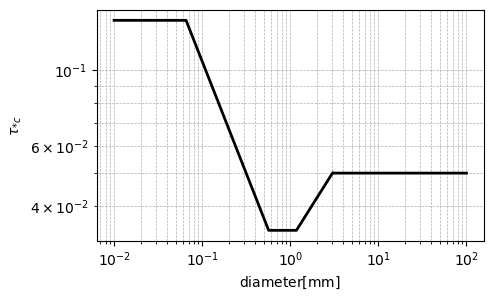

In [9]:
fig, ax = plt.subplots( figsize=(5, 3))
ax.plot(dd*1000, tau, 'k-', lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('diameter$[\\mathrm{mm}]$')
ax.set_ylabel('$\\tau_{*c}$')
ax.grid(which='both', linestyle='--', lw=0.5)
plt.show()

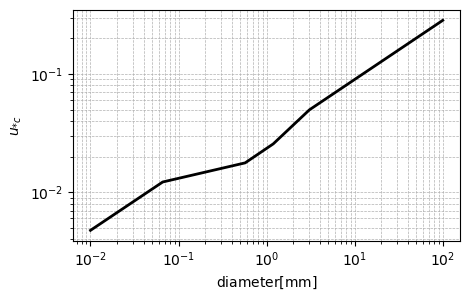

In [10]:
fig, ax = plt.subplots( figsize=(5, 3))
ax.plot(dd*1000, us, 'k-', lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('diameter$[\\mathrm{mm}]$')
ax.set_ylabel('$u_{*c}$')
ax.grid(which='both', linestyle='--', lw=0.5)
plt.show()

2. 河幅:200m，河床勾配:1/1000の広矩形断面水路を流量:500m3/s が等流状態で流下している場合、移動しない最大粒径を求めよ。ただし，Manningの粗度係数:0.03とする。

摩擦速度を求めて上図との交点から算出する

In [11]:
Q = 500 #流量[m^3/s]
ib=1/1000
B = 200 #幅[m]
q = Q/B #単位幅流量[m^2/s]
manning = 0.03 #マニングの粗度係数
h0 = (q**2*manning**2/ib)**0.3 #等流水深
usp = np.sqrt(9.8*h0*ib)

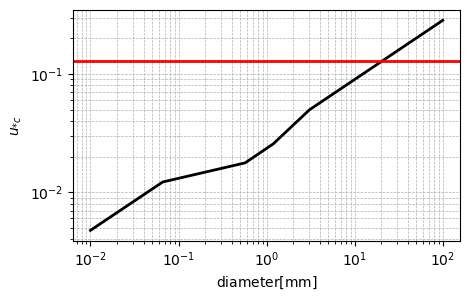

In [12]:
fig, ax = plt.subplots( figsize=(5, 3))
ax.plot(dd*1000, us, 'k-', lw=2)
ax.axhline(usp, color='r', lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('diameter$[\\mathrm{mm}]$')
ax.set_ylabel('$u_{*c}$')
ax.grid(which='both', linestyle='--', lw=0.5)
plt.show()

または、二分法を用いて求めても良い。

In [13]:
fus = lambda d : np.sqrt(iwagaki(d)*1.65*9.8*d)

dmax = 1000/1000
dmin = 0.1/1000
while np.abs(dmax - dmin) > 1e-6:
    dmean = (dmax + dmin) / 2
    ust = fus(dmean)
    if ust < usp:
        dmin = dmean
    else:
        dmax = dmean


print(f'd: {dmean*1000 :.3f} mm')

d: 20.351 mm


## 掃流砂量式について


掃流砂量式は以下のとおりである。


### 芦田・道上式

$$
\begin{align}
 \frac{q_b}{\sqrt{\rho_{sw} g d^3}} &= 17 \tau_{*e}^{3/2}\left(1-\frac{\tau_{* c}}{\tau_*}\right)\left(1-\sqrt{\frac{\tau_{* c}}{\tau_*}}\right) \\
 \tau_{* e} &= \frac{u_{*e}^2}{\rho_{sw} g d} \\
\dfrac{V}{u_{*e}} &= \dfrac{1}{\kappa}\log_e{\dfrac{h}{k_s}} - \dfrac{1}{\kappa} + A_r   \\
k_s &=  d(1+2\tau_*) \\
\kappa &= 0.4 , A_r = 8.5 \\
\end{align}
$$

ここに、$q_b$：掃流砂量、$\rho_{sw}$：砂の水中比重、$d$：(平均)粒径、$\tau_{*e}$：有効無次元掃流力、$\tau_{*c}$：無次元限界掃流力、$\tau_*$：無次元掃流力、$V$：水深平均流速、$h$：水深を示す。

$\tau_{*c}$は岩垣の式で算出する。

### MPM式

$$
\begin{align}
\frac{q_b}{\sqrt{\rho_{sw} g d^3}} &= 8\left(\tau_{*e} - \tau_{*c} \right)^{3 / 2} \\
\tau_{*c} &=0.047  \\
\tau_{*e}&= \tau_* \left(\frac{n_b}{n}\right)^{3 / 2} \\
 n_b&=0.0192 d_{90}{ }^{1 / 6}
\end{align}
$$

ここに、$q_b$：掃流砂量、$\rho_{sw}$：砂の水中比重、$d$：(平均)粒径、$d_{90}$：(平均)粒径[cm]、$\tau_{*e}$：有効無次元掃流力、$\tau_{*c}$：無次元限界掃流力、$\tau_*$：無次元掃流力、$n$：マニングの粗度係数を示す。




1. 代表的な掃流砂量式である芦田・道上式、MPM式を用いて、無次元掃流力(x軸)と単位幅掃流砂量(y軸)の関係を図示せよ。粒径は1mmと10mmの2ケースとする。また、有効無次元掃流力は無次元掃流力の0.2倍とする。
    ⇒ 一応回答は出しますが問題が悪かったのです。0.2倍のところで変なことが起こってます。

In [14]:
tauc1 = iwagaki(1/1000)
tauc10 = iwagaki(10/1000)
print('tauc1', tauc1, 'tauc10', tauc10)
rhosw = 1.65
g = 9.8

qbAM = lambda taus, tauc, taue, dm : np.sqrt(rhosw*g*dm**3)*17.0*taue**1.5*(1.0-tauc/taus)*(1.0-np.sqrt(tauc/taus))

def qbMPM(taus, taue, dm, tauc=0.047):
    dtaut = taus - tauc
    dtau = np.where(dtaut < 0, 0, dtaut)
    qb = np.sqrt(rhosw*g*dm**3)*8.0*dtau**1.5
    return qb

tau = np.logspace(np.log10(0.05), np.log10(1), num=100, endpoint=True, base=10.0)

qbAM1   = qbAM(tau,tauc1,tau*0.2,1/1000)
qbAM10  = qbAM(tau,tauc10,tau*0.2,10/1000)
qbMPM1  = qbMPM(tau,tau*0.2,1/1000)
qbMPM10 = qbMPM(tau,tau*0.2,10/1000)

tauc1 0.034 tauc10 0.05


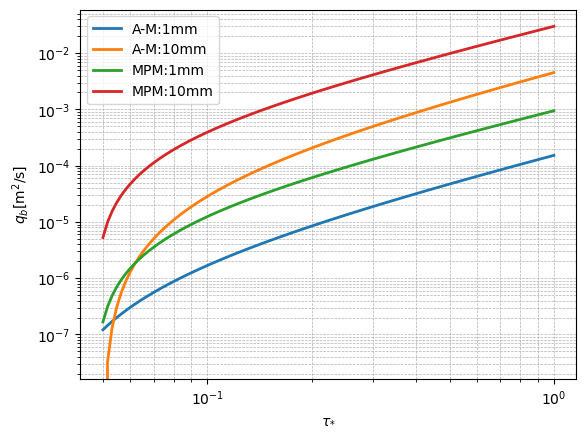

In [15]:
fig, ax = plt.subplots()
ax.plot(tau, qbAM1,  label='A-M:1mm', lw=2)
ax.plot(tau, qbAM10, label='A-M:10mm', lw=2)
ax.plot(tau, qbMPM1, label='MPM:1mm', lw=2)
ax.plot(tau, qbMPM10, label='MPM:10mm', lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\\tau_{*}$')
ax.set_ylabel('$q_b \\mathrm{[m^2/s]}$')
ax.grid(which='both', linestyle='--', lw=0.5)
ax.legend(loc='best')
plt.show()


2. 上の2式に含まれる有効無次元掃流力又は有効摩擦速度について、どのような物理的意味を持つか説明せよ。(難しい場合はパスでO.K.)
    ⇒ 後日回答します。

3. 河幅:200m，河床勾配:1/1000、粒径d60：1mm、Manningの粗度係数:0.03の広矩形断面水路で等流状態で流下している場合、流量（x軸）と掃流砂量（y軸）の関係を上2式を用いて図示せよ。移動限界の判定には岩垣の式を用いて混合粒径の影響は考慮しないものとする。また、有効掃流力は各式の方法を用いて求める。なお、d90は3mmとする。

In [16]:
def calqbAM(hp, q, manning, dm, tauc,g=float(9.8),rhosw=float(1.65)):
    us = np.sqrt(g)*manning*q/hp**(7/6) # 摩擦速度
    taus = us**2/rhosw/g/dm # 無次元掃流力

    if taus <= tauc : # 移動限界の判定
        qb = 0.0
    else:
    # 有効掃流力：面倒なのであまり気にしない。
        Ar = 8.5
        kappa = 0.4
        if np.log(hp/dm/(1.0+2.0*taus)) < 1.0:
            phi = Ar
        else:
            phi = (np.log(hp/dm/(1.0+2.0*taus))-1.0)/kappa + Ar

        U = q/hp
        use = U/phi
        tauet = use**2/rhosw/g/dm
        taue = tauet if tauet < taus else taus

    # Ashida-Michiue Eq. 
        qb = np.sqrt(rhosw*g*dm**3)*17.0*taue**1.5*(1.0-tauc/taus)*(1.0-np.sqrt(tauc/taus))

    return qb

In [17]:
def calqbMPM(hp, q, manning, dm, d90, tauc=float(0.047),g=float(9.8),rhosw=float(1.65)):
    us = np.sqrt(g)*manning*q/hp**(7/6) # 摩擦速度
    taus = us**2/rhosw/g/dm # 無次元掃流力

    if taus <= tauc : # 移動限界の判定
        qb = 0.0
    else:
        d90cm = d90 *100
        nb = 0.0192*d90cm**(1/6)
        tauet = taus*(nb/manning)**1.5
        taue = tauet if tauet < taus else taus
        dtaut = taue - tauc
        dtau = 0 if dtaut < 0 else dtaut

    # MPM Eq. 
        qb = np.sqrt(rhosw*g*dm**3)*8.0*dtau**1.5

    return qb

In [18]:
B = 200
Q = np.linspace(10, 1000, num=100, endpoint=True)
q = Q/B
ib = 1/1000
manning = 0.03
d60 = 1/1000
d90 = 3/1000
h0 = (q**2*manning**2/ib)**0.3 #等流水深
tauc1 = iwagaki(d60)

In [19]:
qbAM = [calqbAM(h0p, qp, manning, d60, tauc1) for h0p, qp in zip(h0, q)]
qbAM = np.array(qbAM)

qbMPM = [calqbMPM(h0p, qp, manning, d60, d90) for h0p, qp in zip(h0, q)]
qbMPM = np.array(qbMPM)

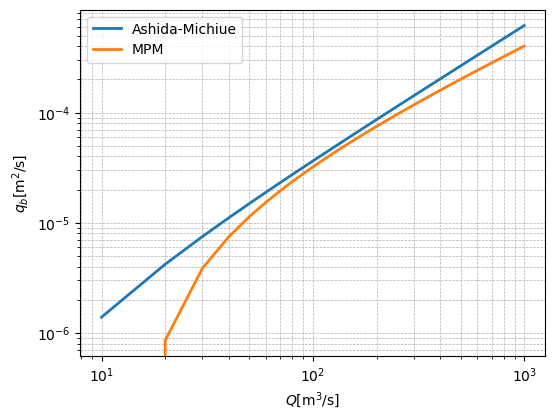

In [20]:
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.plot(Q, qbAM,  label='Ashida-Michiue', lw=2)
ax.plot(Q, qbMPM,  label='MPM', lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$Q \\mathrm{[m^3/s]}$')
ax.set_ylabel('$q_b \\mathrm{[m^2/s]}$')
ax.grid(which='both', linestyle='--', lw=0.5)
ax.legend(loc='best')
plt.show()